In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv("Arima_Rathnapura.csv",parse_dates=['Month'],index_col=['Month'])

In [30]:
df.head()

,Production/Kg
Month,
2016-01-01,6114284.0
2016-02-01,5452146.0
2016-03-01,5424558.0
2016-04-01,6383458.0
2016-05-01,6552106.0


# ReSample

In [31]:
ts=df['Production/Kg'].resample('MS').sum()

In [32]:
ts.head()

Month
2016-01-01    6114284.0
2016-02-01    5452146.0
2016-03-01    5424558.0
2016-04-01    6383458.0
2016-05-01    6552106.0
Freq: MS, Name: Production/Kg, dtype: float64

<Axes: xlabel='Month'>

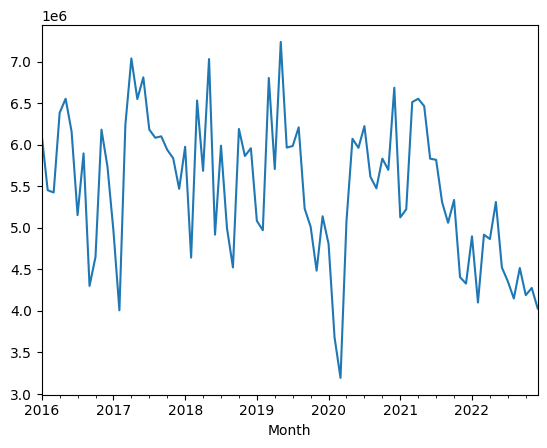

In [33]:
ts.plot()

# Stationarity check

In [34]:
import statsmodels.api as sm

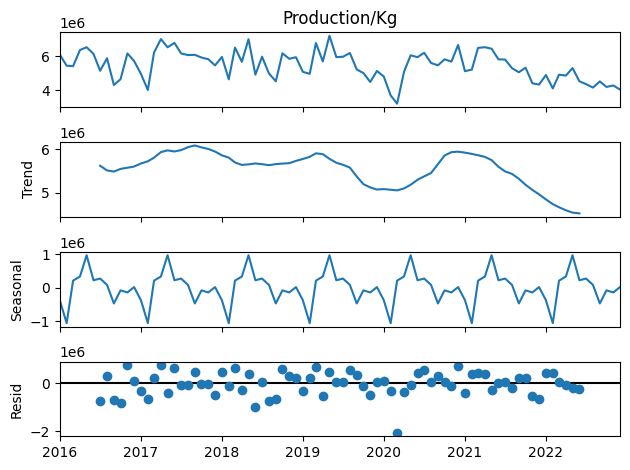

In [35]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
addtest=adfuller(ts)

In [11]:
print('pvalue of adfuller test is: ',addtest[1])

pvalue of adfuller test is:  0.11068006675718123


# Train test split

In [36]:
len(ts)

84

In [37]:
train=ts[:64]
test=ts[64:]

# ARIMA Model Building

## p,d,q

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train, order=(1, 0, 1)).fit()


## Predict test dataset

In [43]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [44]:
len(train),(len(ts)-1)

(64, 83)

In [45]:
pred.head()

2021-05-01    5.969287e+06
2021-06-01    5.796985e+06
2021-07-01    5.724849e+06
2021-08-01    5.694649e+06
2021-09-01    5.682005e+06
Freq: MS, Name: predicted_mean, dtype: float64

## Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
error=np.sqrt(mean_squared_error(test,pred))
error

1056591.4079787626

In [48]:
test.mean(),np.sqrt(test.var())

(4833931.25, 673979.0398089368)

<Axes: xlabel='Month'>

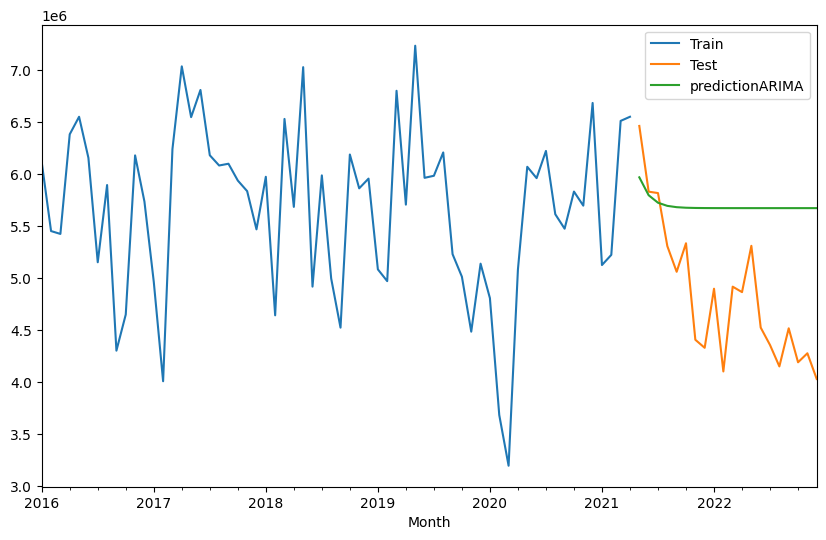

In [22]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionARIMA')

# Predict Future Data

In [23]:
final_model=ARIMA(ts,order=(1,0,1)).fit()

In [24]:
prediction=final_model.predict(len(ts),len(ts)+6)

<Axes: xlabel='Month'>

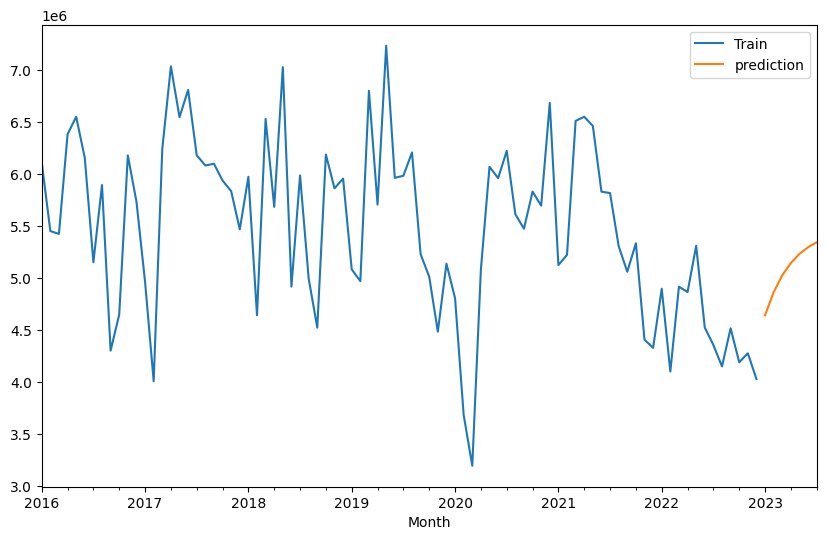

In [25]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='prediction')

## Get ARIMA Hyperparameters p d q

##  1.method ACF PACF Plots
##   2.AUTO_ARIMA Function
##    3.for loop

In [41]:
import itertools

In [42]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [43]:
pdq_combination=list(itertools.product(p,d,q))

In [44]:
len(pdq_combination)

128

In [50]:
rmse=[]
order1=[]

In [58]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [52]:
results.to_csv('ARIMA_result.csv')

In [42]:
mse = mean_squared_error(test, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1116385403414.5442


In [53]:
mape = np.mean(np.abs((test - pred) / test)) * 100


In [54]:
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 20.78%


In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model3 = ARIMA(train, order=(3, 1, 7)).fit()


C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
pred3=model3.predict(start=len(train),end=(len(ts)-1))

In [58]:
mape2 = np.mean(np.abs((test - pred3) / test)) * 100


In [59]:
print(f'Mean Absolute Percentage Error (MAPE): {mape2:.2f}%')

Mean Absolute Percentage Error (MAPE): 17.06%


In [60]:
pred3.head()

2021-05-01    6.089183e+06
2021-06-01    5.651846e+06
2021-07-01    6.061312e+06
2021-08-01    5.635391e+06
2021-09-01    5.795200e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [61]:
pred3.tail()

2022-08-01    5.337810e+06
2022-09-01    5.511241e+06
2022-10-01    5.292572e+06
2022-11-01    5.508302e+06
2022-12-01    5.335953e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [62]:
final_model2=ARIMA(ts,order=(3,1,7)).fit()

C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
prediction2=final_model2.predict(len(ts),len(ts)+6)

<Axes: xlabel='Month'>

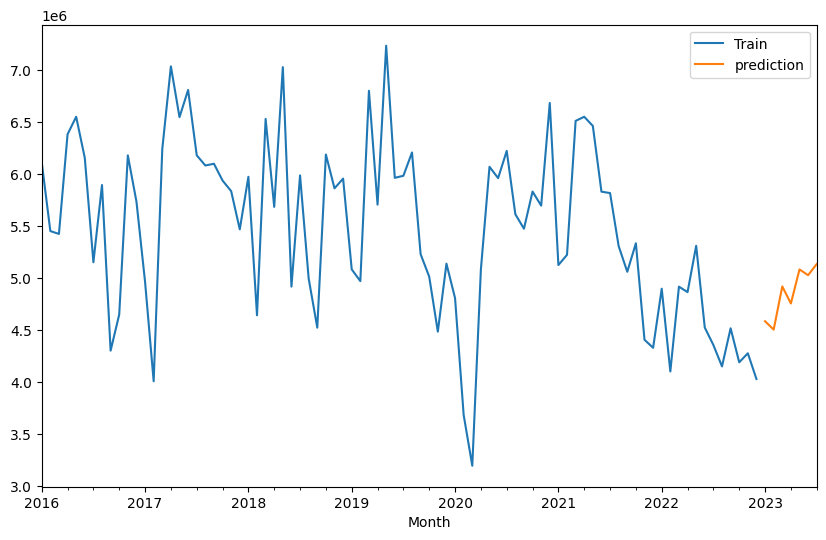

In [64]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction2.plot(legend=True,label='prediction')

In [65]:
prediction2.head()

2023-01-01    4.584366e+06
2023-02-01    4.503449e+06
2023-03-01    4.919150e+06
2023-04-01    4.755177e+06
2023-05-01    5.082705e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [66]:
prediction2.tail()

2023-03-01    4.919150e+06
2023-04-01    4.755177e+06
2023-05-01    5.082705e+06
2023-06-01    5.027533e+06
2023-07-01    5.135091e+06
Freq: MS, Name: predicted_mean, dtype: float64